In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
from matplotlib.ticker import NullFormatter
import numpy as np


In [9]:
locations = pd.read_csv('country-and-continent-codes-list.csv') #declare datasets
player_earnings = pd.read_csv('highest_earning_players.csv')
team_earnings = pd.read_csv('highest_earning_teams.csv')
eSportsGen=  pd.read_csv('GeneralEsportData.csv', encoding= 'ISO-8859-1')
eSportsHist=  pd.read_csv('HistoricalEsportData.csv', encoding= 'ISO-8859-1')


List of all unique games

In [10]:
player_earnings['Game'].unique()

array(['Counter-Strike: Global Offensive', 'Dota 2', 'League of Legends',
       'Fortnite', 'Overwatch', 'Starcraft II', 'Heroes of the Storm',
       'PUBG', 'Arena of Valor', 'Hearthstone'], dtype=object)

In [11]:
player_earnings['CountryCode'] =player_earnings['CountryCode'].apply(lambda x : x.upper()) #make all rows in CountryCode initialized 

player_earnings_country = player_earnings.groupby(player_earnings['CountryCode']).sum() #groupby Country so its set to index 
player_earnings_country.drop(['PlayerId'], axis = 1,inplace =True) # drop player id column
player_earnings_country.reset_index(inplace =True)# reset index to orignal
player_earnings_country # count the value of dataset

,CountryCode,TotalUSDPrize
0,AR,1174159.24
1,AT,2742223.11
2,AU,7999674.76
3,BA,762802.56
4,BE,1230174.53
5,BG,5741392.45
6,BR,5777552.00
7,BY,779629.42
8,CA,13483648.61
9,CH,876563.76


In [12]:
locations['Two_Letter_Country_Code'].dropna(inplace=True) #drop null values


In [13]:
total_usd = player_earnings.groupby(player_earnings['CountryCode']).sum()['TotalUSDPrize']  # declare total usd  to add up all earnings by country


In [14]:
list_of_countries = list(player_earnings_country['CountryCode']) # set list of countries to CountryCode series
len(list_of_countries)

56

In [15]:
player_earnings_country.set_index('CountryCode',drop=True,inplace=True) #set the index values of CountryCode 


In [16]:
transfer = player_earnings_country['TotalUSDPrize']  # set transfer to a series


In [17]:
def remove_country(value) : #created a function to remove the countries that didn't have a value in list_of_countries

        if value not in list_of_countries:
            return 1
        else :
            return value
         


In [18]:
locations['Two_Letter_Country_Code'] = locations['Two_Letter_Country_Code'].map(remove_country) #used the map method to apply the function remove_country


In [19]:
locations['Two_Letter_Country_Code'].value_counts() # call value counts

1     203
RU      2
KZ      2
TR      2
LV      1
LT      1
MO      1
MY      1
MX      1
NL      1
NO      1
PK      1
PH      1
PL      1
RO      1
SG      1
KR      1
SK      1
VN      1
SI      1
ES      1
SE      1
CH      1
TH      1
UA      1
MK      1
GB      1
US      1
LB      1
JO      1
AR      1
CU      1
AU      1
AT      1
BE      1
BA      1
BR      1
BG      1
BY      1
CA      1
CN      1
TW      1
HR      1
CZ      1
JP      1
DK      1
EE      1
FI      1
FR      1
DE      1
GI      1
GR      1
HK      1
IE      1
IL      1
IT      1
UZ      1
Name: Two_Letter_Country_Code, dtype: int64

In [20]:
list_of_countries_clean = locations[locations['Two_Letter_Country_Code'] != 1] #created a new data dframe where all countries that aren't in player earnings appear
list_of_countries_clean.drop_duplicates(inplace=True,subset = ['Country_Name'])


C:\Users\muees\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
list_of_countries_clean.set_index('Two_Letter_Country_Code',drop=True,inplace = True) #set index to Two Letter Country Code and update values
list_of_countries_clean

,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number
Two_Letter_Country_Code,,,,,
AR,South America,SA,"Argentina, Argentine Republic",ARG,32.0
AU,Oceania,OC,"Australia, Commonwealth of",AUS,36.0
AT,Europe,EU,"Austria, Republic of",AUT,40.0
BE,Europe,EU,"Belgium, Kingdom of",BEL,56.0
BA,Europe,EU,Bosnia and Herzegovina,BIH,70.0
BR,South America,SA,"Brazil, Federative Republic of",BRA,76.0
BG,Europe,EU,"Bulgaria, Republic of",BGR,100.0
BY,Europe,EU,"Belarus, Republic of",BLR,112.0
CA,North America,NaN,Canada,CAN,124.0


In [22]:
list_of_countries_clean['Country_Earnings'] = transfer # update the Country Earnings with transfer


C:\Users\muees\AppData\Local\Temp/ipykernel_53708/1572036712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_of_countries_clean['Country_Earnings'] = transfer # update the Country Earnings with transfer


In [23]:
list_of_countries_clean #declare the final clal

,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number,Country_Earnings
Two_Letter_Country_Code,,,,,,
AR,South America,SA,"Argentina, Argentine Republic",ARG,32.0,1174159.24
AU,Oceania,OC,"Australia, Commonwealth of",AUS,36.0,7999674.76
AT,Europe,EU,"Austria, Republic of",AUT,40.0,2742223.11
BE,Europe,EU,"Belgium, Kingdom of",BEL,56.0,1230174.53
BA,Europe,EU,Bosnia and Herzegovina,BIH,70.0,762802.56
BR,South America,SA,"Brazil, Federative Republic of",BRA,76.0,5777552.00
BG,Europe,EU,"Bulgaria, Republic of",BGR,100.0,5741392.45
BY,Europe,EU,"Belarus, Republic of",BLR,112.0,779629.42
CA,North America,NaN,Canada,CAN,124.0,13483648.61


In [24]:
list(total_usd) == list(list_of_countries_clean['Country_Earnings']) #try to compare if total usd and country earnings are the same
print(len(list(total_usd)))
print(len(list(list_of_countries_clean['Country_Earnings'])))

56
56


In [25]:
x = dict(total_usd) 
test_list_of_countries = dict(list_of_countries_clean['Country_Earnings']) # changed to dict
x
test_list_of_countries

{'AR': 1174159.24,
 'AU': 7999674.76,
 'AT': 2742223.11,
 'BE': 1230174.53,
 'BA': 762802.56,
 'BR': 5777552.0,
 'BG': 5741392.45,
 'BY': 779629.42,
 'CA': 13483648.61,
 'CN': 72391878.56,
 'TW': 4399345.63,
 'HR': 543473.48,
 'CU': 77092.86,
 'CZ': 564622.5800000001,
 'DK': 26840800.02,
 'EE': 3370014.91,
 'FI': 18876262.25,
 'FR': 15803240.180000002,
 'DE': 10143181.56,
 'GI': 126204.51,
 'GR': 94073.0,
 'HK': 1624213.23,
 'IE': 133114.01,
 'IL': 2464688.73,
 'IT': 347922.85,
 'JP': 563446.25,
 'KZ': 1587002.43,
 'JO': 6331742.35,
 'KR': 58441733.71,
 'LB': 4193412.69,
 'LV': 269887.84,
 'LT': 234862.77000000002,
 'MO': 1337308.37,
 'MY': 6212272.71,
 'MX': 377144.16,
 'NL': 3914253.2,
 'NO': 4251594.63,
 'PK': 3608317.34,
 'PH': 3475039.77,
 'PL': 5865044.1899999995,
 'RO': 2479675.14,
 'RU': 10822892.709999999,
 'SG': 1553261.96,
 'SK': 1369307.32,
 'VN': 777781.71,
 'SI': 664098.6,
 'ES': 892994.22,
 'SE': 20770423.01,
 'CH': 876563.76,
 'TH': 1845999.15,
 'TR': 851036.32,
 'UA': 

In [67]:
compare_dict(x,test_list_of_countries) # compare if the key and values of each dict 1 

True

In [66]:

def compare_dict(dict1,dict2 ):
    for key in dict1.keys():
            if dict1[key] != dict2[key]:
                return False
    return True


<AxesSubplot:>

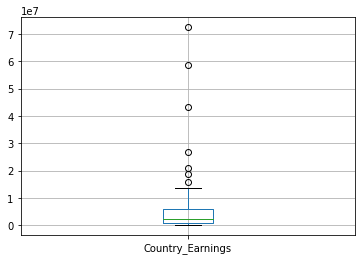

In [26]:
list_of_countries_clean.boxplot(column= ['Country_Earnings']) # 7 out of 56 outliers
# 12% magrin of error

In [77]:
list_of_countries_clean.sort_values(by= ['Country_Earnings'], ascending= False) # China, Korea, United States, Denmark.Sweden,Finland,France

,Continent_Name,Continent_Code,Country_Name,Three_Letter_Country_Code,Country_Number,Country_Earnings
Two_Letter_Country_Code,,,,,,
CN,Asia,AS,"China, People's Republic of",CHN,156.0,72391878.56
KR,Asia,AS,"Korea, Republic of",KOR,410.0,58441733.71
US,North America,NaN,United States of America,USA,840.0,43099381.78
DK,Europe,EU,"Denmark, Kingdom of",DNK,208.0,26840800.02
SE,Europe,EU,"Sweden, Kingdom of",SWE,752.0,20770423.01
FI,Europe,EU,"Finland, Republic of",FIN,246.0,18876262.25
FR,Europe,EU,"France, French Republic",FRA,250.0,15803240.18
CA,North America,NaN,Canada,CAN,124.0,13483648.61
RU,Europe,EU,Russian Federation,RUS,643.0,10822892.71


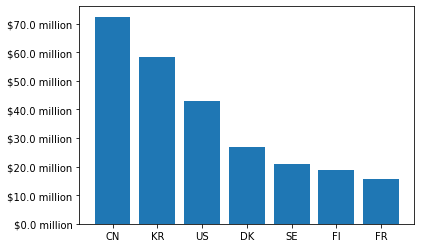

In [125]:
def formatter(x, pos):
    return "$" + str(round(x / 1e6, 1)) + " million"

temp =list_of_countries_clean.sort_values(by= ['Country_Earnings'], ascending= False).head(7)
fig, ax = plt.subplots()
#temp['Country_Earnings'] = math.floor(temp['Country_Earnings'])
countries = temp.index
earnings = temp['Country_Earnings']
df = pd.DataFrame({'Countries': countries, 'Earnings': earnings})
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.bar(x='Countries',height= 'Earnings',data = df)
plt.show()


Most tournaments by genres

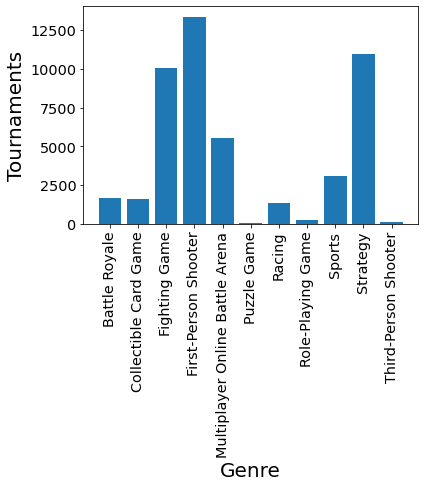

<Figure size 1872x432 with 0 Axes>

In [55]:
esport_pop = eSportsGen.groupby("Genre").agg({"TotalTournaments": np.sum})
esport_pop.reset_index(inplace=True)
fig, ax = plt.subplots()
plt.figure(figsize=(26,6))
ax.bar(x="Genre", height="TotalTournaments", data = esport_pop)
ax.set_xlabel("Genre")
ax.xaxis.label.set_size(20)
ax.xaxis.set_tick_params(rotation=90)
ax.xaxis.set_tick_params(labelsize='x-large')
ax.set_ylabel("Tournaments")
ax.yaxis.label.set_size(20)
ax.yaxis.set_tick_params(labelsize='x-large')
plt.show()

For Strategy these a variety of games but core standout alone is StarCraft II , which is a real time strategy game that dominates Korean gaming culture. It's was an early pioneer esports  and made a lot in its life time.

In [47]:
strategy = eSportsGen.loc[eSportsGen["Genre"] =="Strategy"] # these a variety of games here  like pokemon VGC and chess.com and even Mario Party. wouldn't be very intersting to plot
highest_earner = strategy.loc[strategy["TotalEarnings"]==strategy["TotalEarnings"].max()]
highest_earner
#strategy

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
35,StarCraft II,2010,Strategy,36249504.04,29428638.63,2115,6283


First person shooters CSGO has the most for tournaments

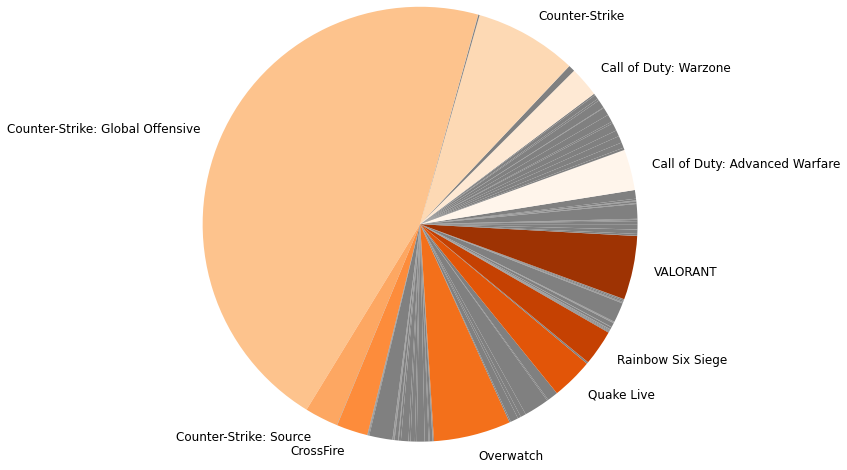

In [50]:
esport_shoot = eSportsGen[eSportsGen["Genre"] == "First-Person Shooter"]
esport_shoot = esport_shoot[["Game", "TotalTournaments"]].groupby(by = "Game").sum()
esport_shoot["Share"] = esport_shoot["TotalTournaments"] / esport_shoot["TotalTournaments"].sum()

plt.figure(figsize=(20,5))
# define color map
cmap = plt.get_cmap("Oranges")
cmap = iter(cmap([i/10 for i in range(10)]))
# find biggest prized games - give them color
cols = []
labs = []
mostvalue = esport_shoot.nlargest(10, 'TotalTournaments')
for i, gamename in enumerate(esport_shoot.index):
    if gamename in mostvalue.index:
        cols.append(next(cmap))
        labs.append(gamename)
    else:
        cols.append("gray")
        labs.append("")
plt.pie(esport_shoot.TotalTournaments, labels=labs, colors=cols, radius=2, textprops={'fontsize': 12})
plt.show()

What the most popular fighting game  to be held. Super Smash bros events dominate this field unsurprisingly but what is most interesting thing is that melee's popularity never ceased for tournamenets.

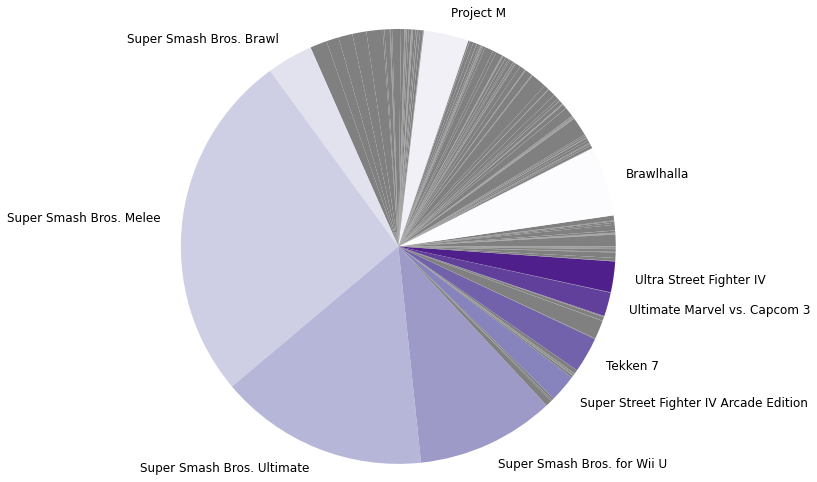

In [28]:
esport_fight = eSportsGen[eSportsGen["Genre"] == "Fighting Game"]
esport_fight = esport_fight[["Game", "TotalTournaments"]].groupby(by = "Game").sum()
esport_fight["Share"] = esport_fight["TotalTournaments"] / esport_fight["TotalTournaments"].sum()
# def figure size
plt.figure(figsize=(20,5))
# define color map
cmap = plt.get_cmap("Purples")
cmap = iter(cmap([i/10 for i in range(10)]))
# find biggest prized games - give them color
cols = []
labs = []
mostvalue = esport_fight.nlargest(10, 'TotalTournaments')
for i, gamename in enumerate(esport_fight.index):
    if gamename in mostvalue.index:
        cols.append(next(cmap))
        labs.append(gamename)
    else:
        cols.append("gray")
        labs.append("")
plt.pie(esport_fight.TotalTournaments, labels=labs, colors=cols, radius=2, textprops={'fontsize': 12})
plt.show()


How much the top earning games made in their lifetime. Dota 2  has made a overwhelming among of money its a bit wild how popular overseas it must be.

C:\Users\muees\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


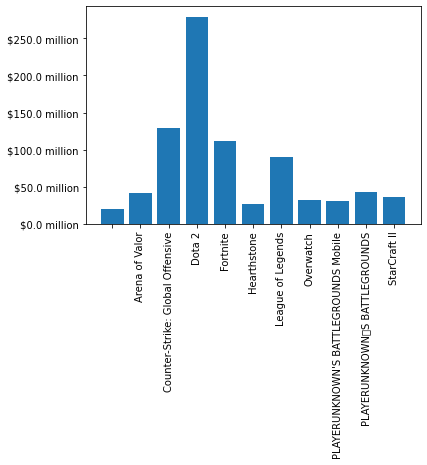

In [27]:
def formatter(x, pos):
    return "$" + str(round(x / 1e6, 1)) + " million"

esport_game = eSportsGen.groupby("Game").sum()
fig, ax = plt.subplots()

names = []
mostvalue = esport_game.nlargest(10, 'TotalEarnings')

for i, gamename in enumerate(esport_game.index):
    if gamename in mostvalue.index: 
        names.append(gamename)
    else: 
        names.append("")


ax.bar(names ,height= esport_game.TotalEarnings)
ax.xaxis.set_tick_params(rotation=90)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())

plt.show()

In [123]:
def formatter(x, pos):
    return str(round(x / 1e6, 1)) + " million"

ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_formatter(NullFormatter())
ax.plot([0, 1], [0, 2e7])
plt.show()